# **Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Maju**


*   Nama: Kirana Alyssa Putri
*   Email: kiranaalyssa.putri@gmail.com
*   ID Dicoding: kiranaalyssa



## **Persiapan**

### Menyiapkan Library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Menyiapkan Data yang akan digunakan

In [ ]:
df = pd.read_csv('employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## **Data Understanding**

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.columns

Index(['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
print("Jumlah kolom numerik:", df.select_dtypes(include='int64').shape[1])
print("Jumlah kolom kategorikal:", df.select_dtypes(include='object').shape[1])

Jumlah kolom numerik: 26
Jumlah kolom kategorikal: 8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [ ]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [ ]:
df.duplicated().sum()

np.int64(0)

## **Data Preparation / Preprocessing**

In [ ]:
# Handling Missing Values
df.dropna(subset=['Attrition'], inplace=True)

In [ ]:
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [ ]:
df.shape

(1058, 35)

In [ ]:
# Mengganti Tipe Data
df['Attrition'] = df['Attrition'].astype('int64')
df['BusinessTravel'] = df['BusinessTravel'].astype('category')
df['Department'] = df['Department'].astype('category')
df['EducationField'] = df['EducationField'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['JobRole'] = df['JobRole'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')
df['Over18'] = df['Over18'].astype('category')
df['OverTime'] = df['OverTime'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmployeeId                1058 non-null   int64   
 1   Age                       1058 non-null   int64   
 2   Attrition                 1058 non-null   int64   
 3   BusinessTravel            1058 non-null   category
 4   DailyRate                 1058 non-null   int64   
 5   Department                1058 non-null   category
 6   DistanceFromHome          1058 non-null   int64   
 7   Education                 1058 non-null   int64   
 8   EducationField            1058 non-null   category
 9   EmployeeCount             1058 non-null   int64   
 10  EnvironmentSatisfaction   1058 non-null   int64   
 11  Gender                    1058 non-null   category
 12  HourlyRate                1058 non-null   int64   
 13  JobInvolvement            1058 non-null   int64   
 1

In [ ]:
df_clean = df.drop(columns=["EmployeeId", "StandardHours", "Over18", "EmployeeCount"])

In [ ]:
df_clean.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# Cek Outliers
numerical_columns = df_clean.select_dtypes(include='number').columns

outlier_count = 0

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hitung berapa outlier di kolom ini
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count += outliers.shape[0]

print(f"Total outlier (IQR method): {outlier_count}")


Total outlier (IQR method): 889


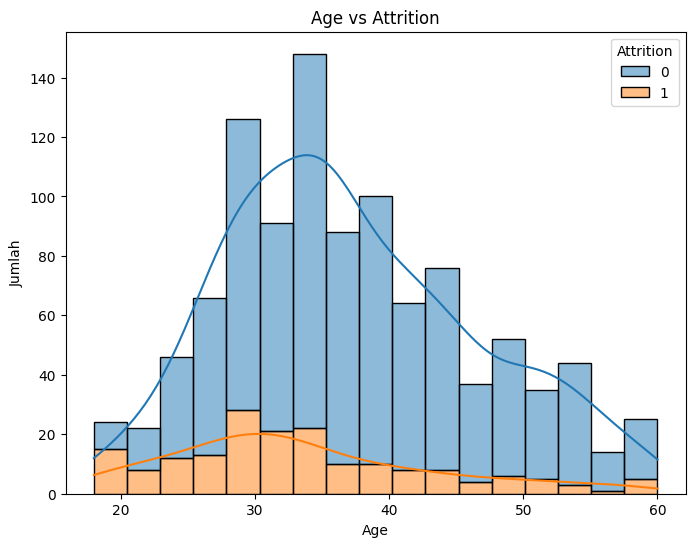

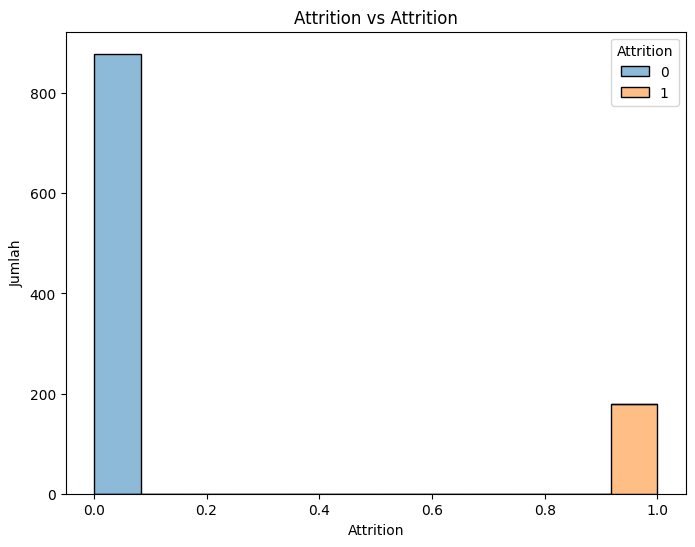

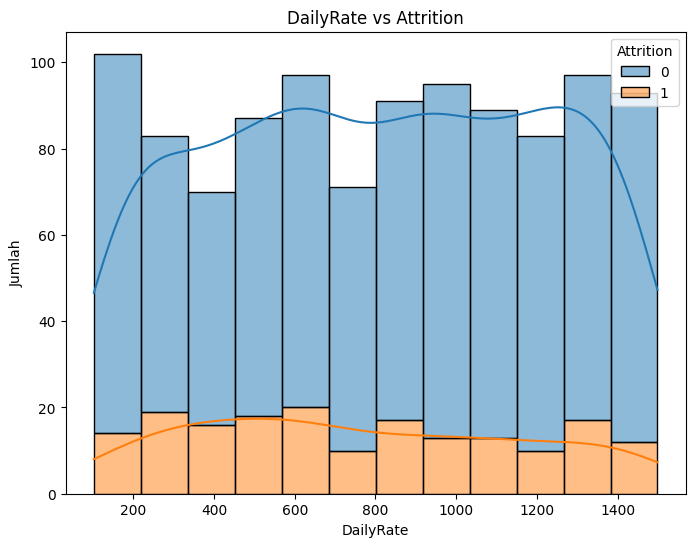

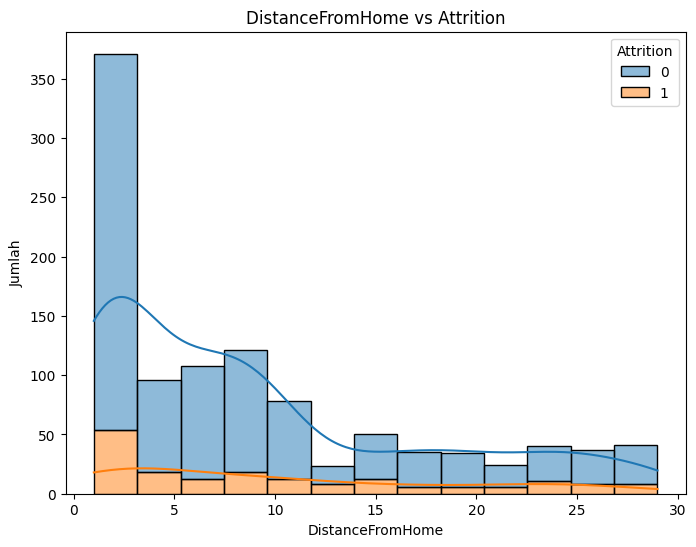

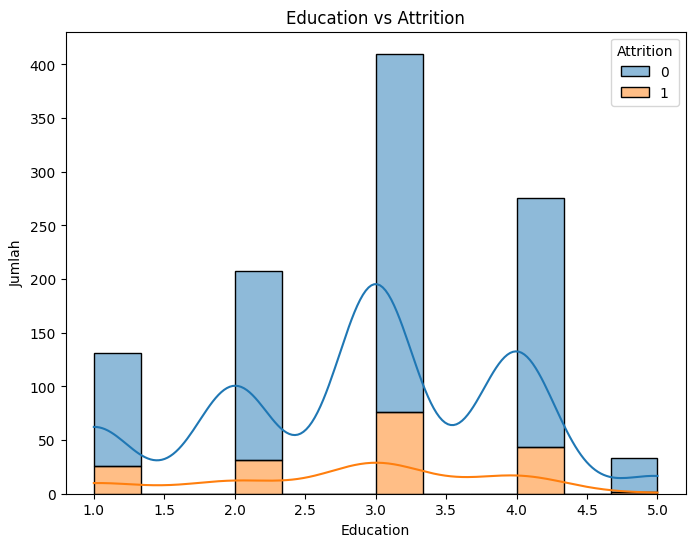

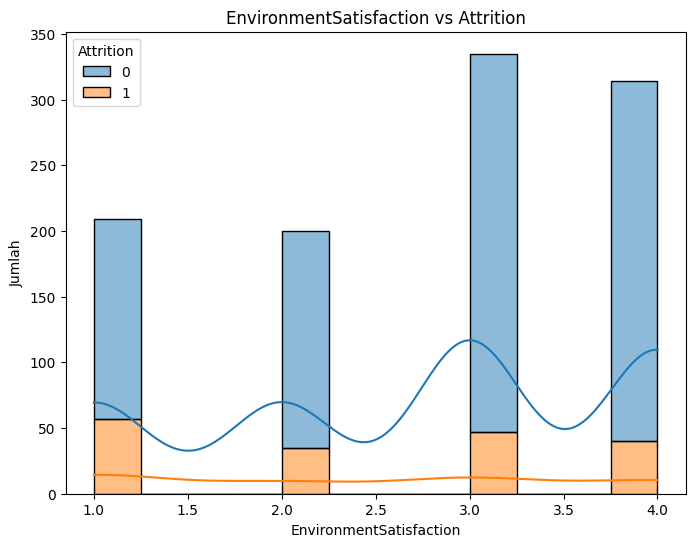

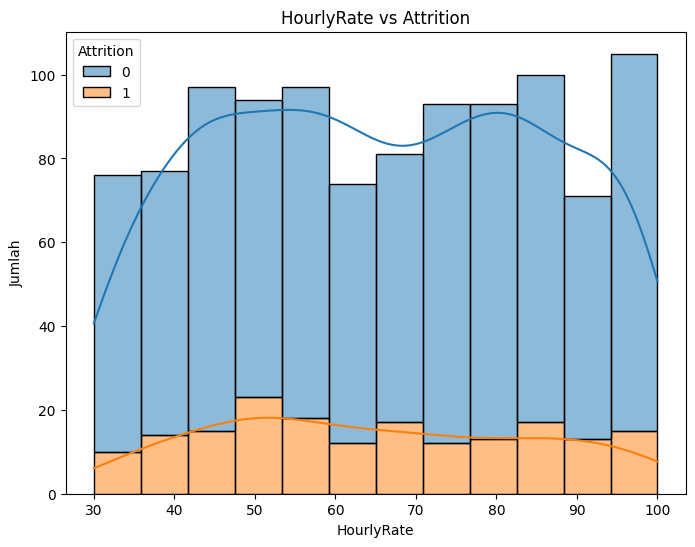

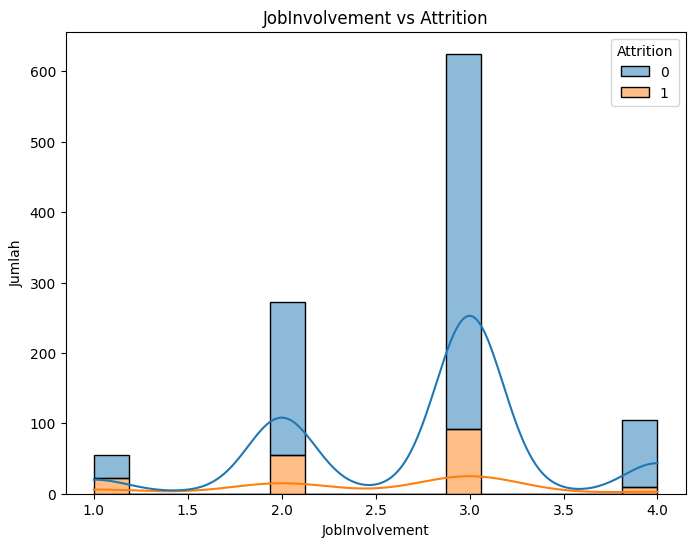

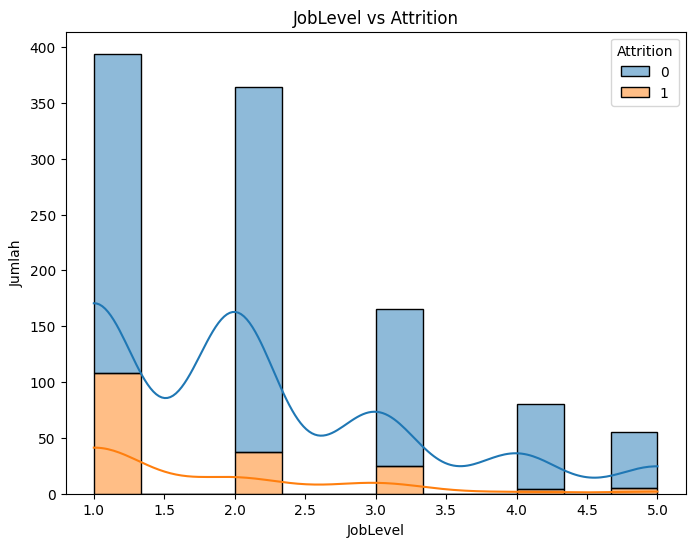

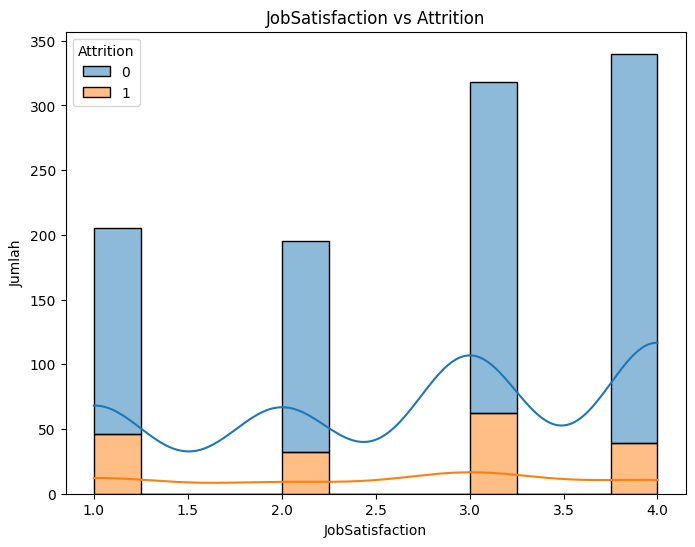

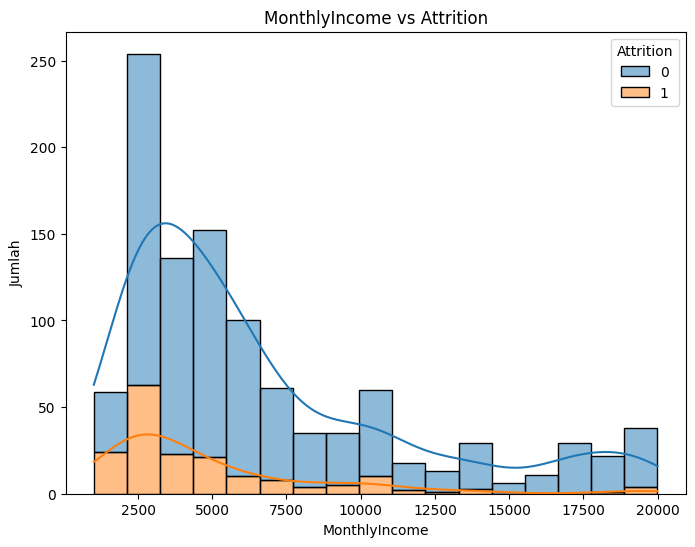

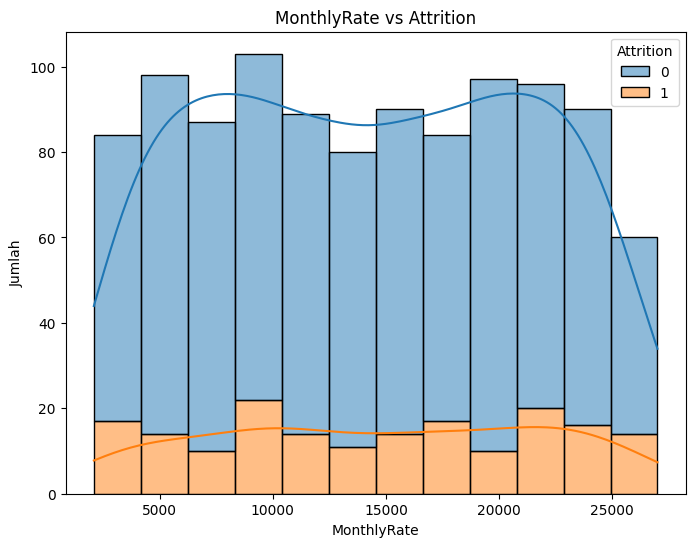

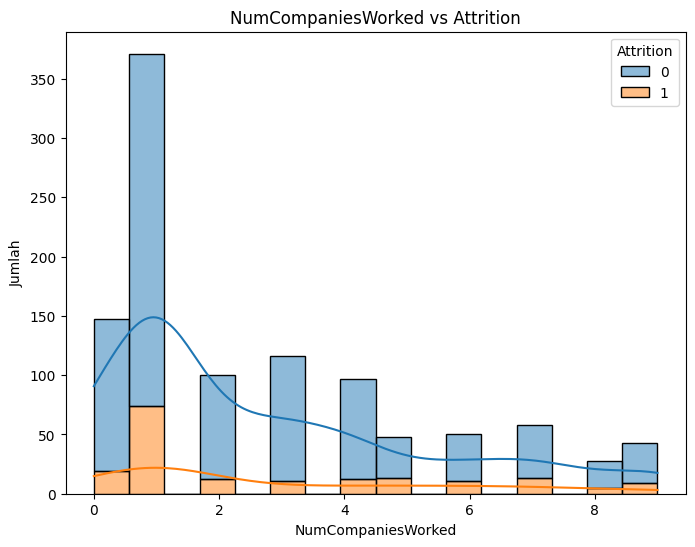

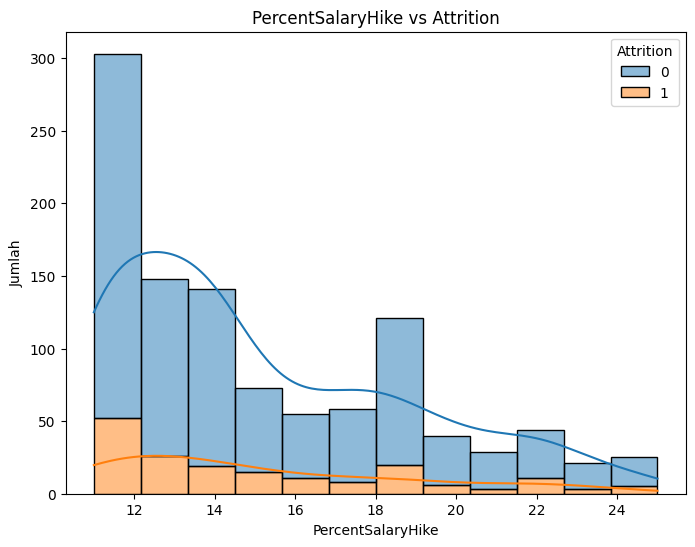

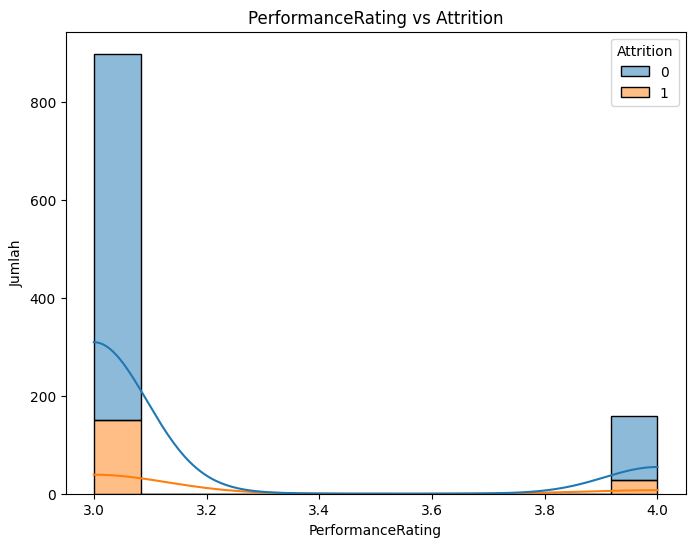

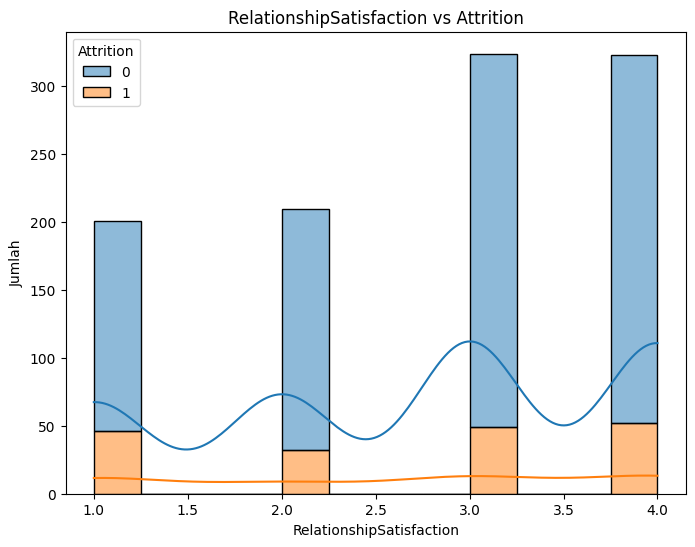

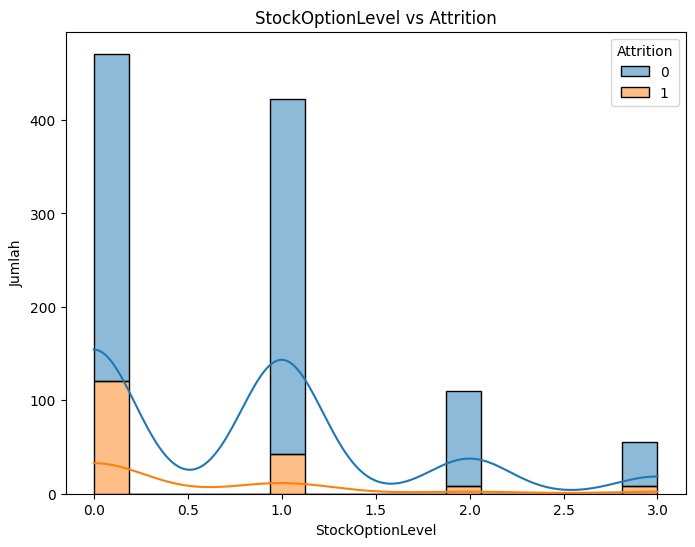

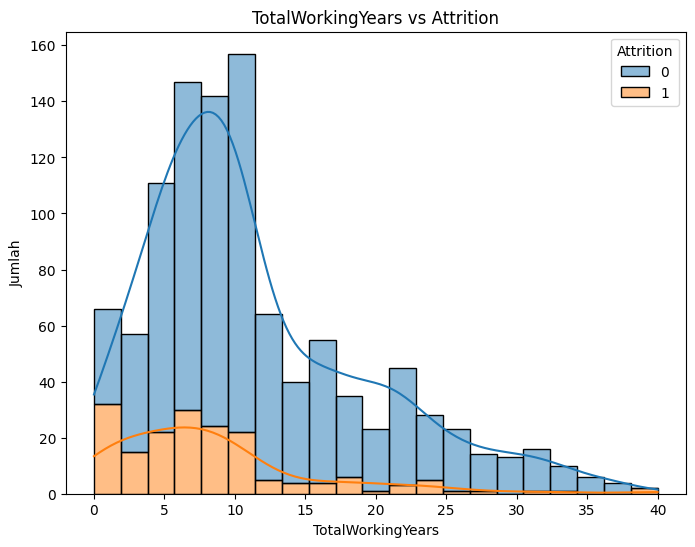

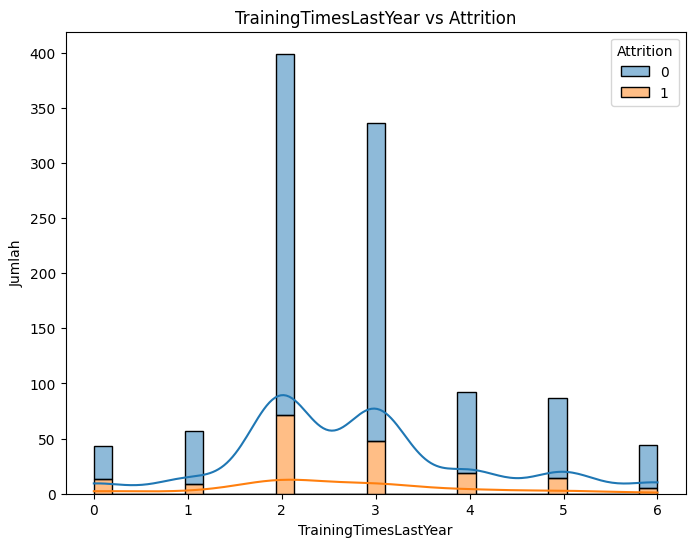

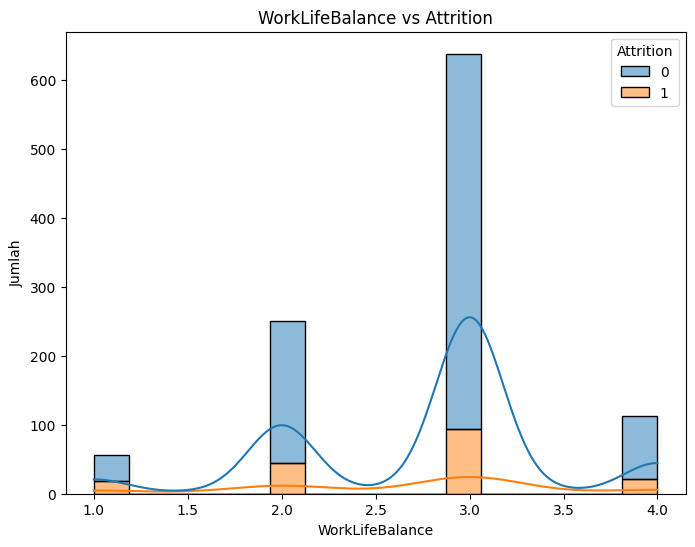

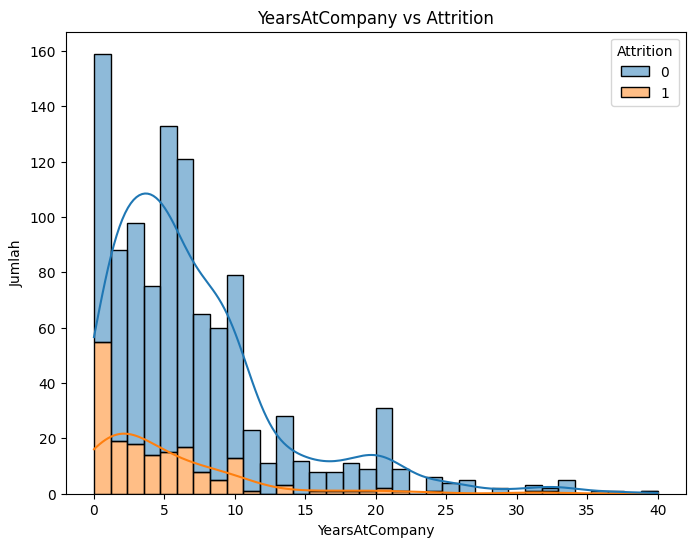

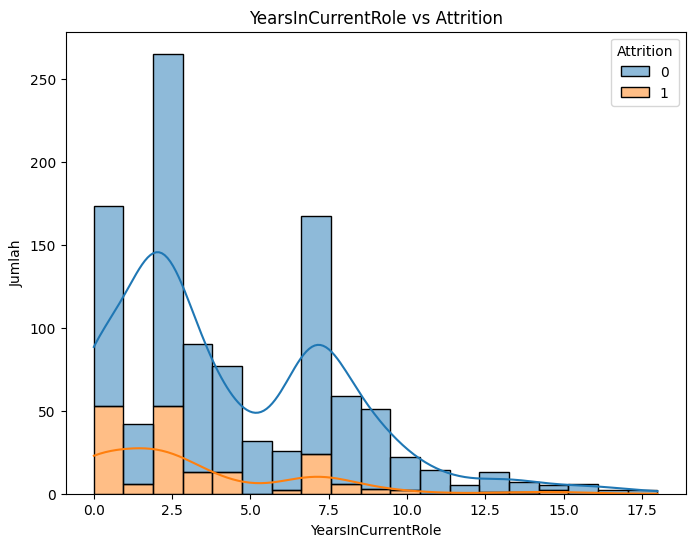

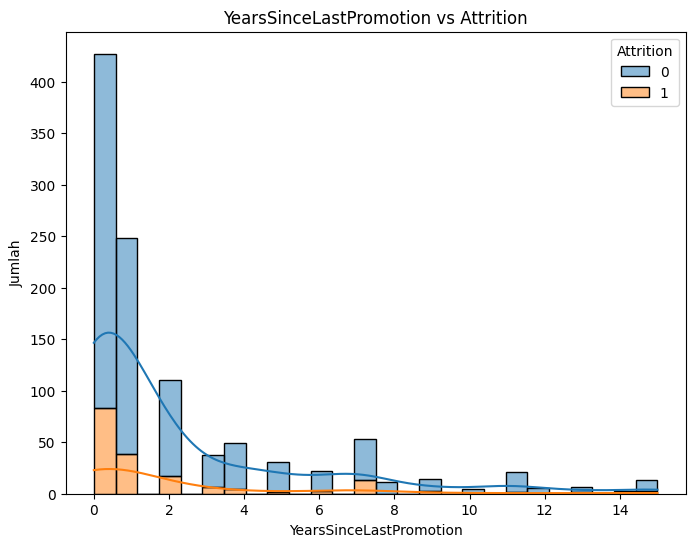

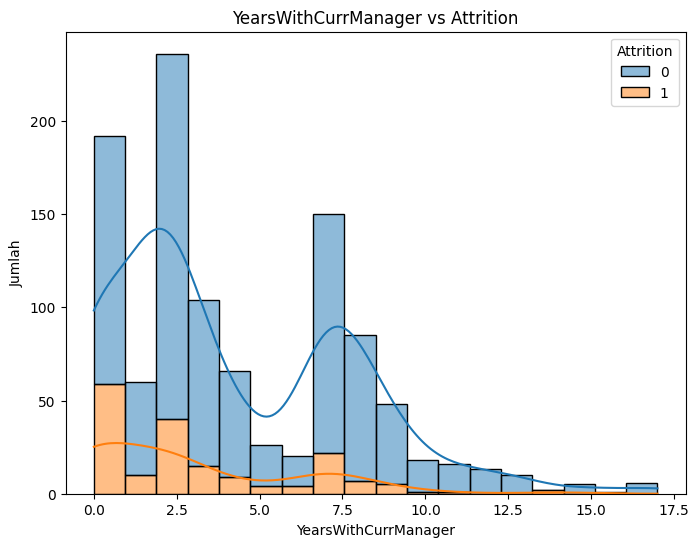

In [ ]:
# Daftar kolom numerikal
numerical_columns = df_clean.select_dtypes(include='number').columns

# Loop untuk visualisasi kolom numerikal vs Attrition
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_clean, x=col, hue='Attrition', kde=True, multiple='stack')
    plt.title(f'{col} vs Attrition')
    plt.xlabel(col)
    plt.ylabel("Jumlah")
    plt.show()

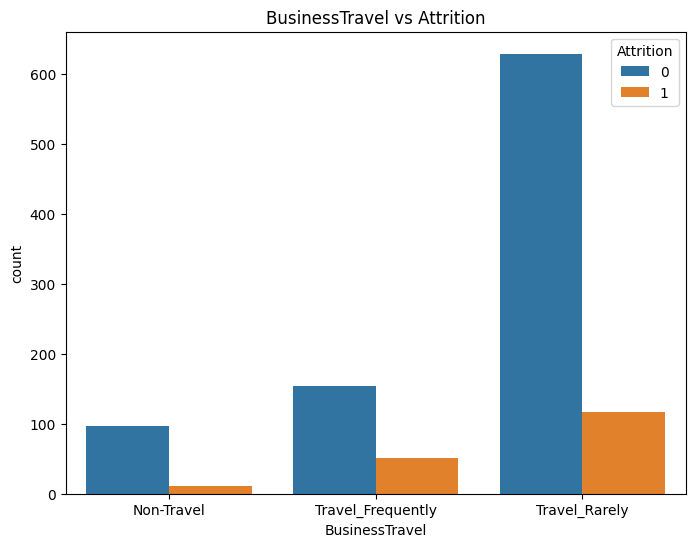

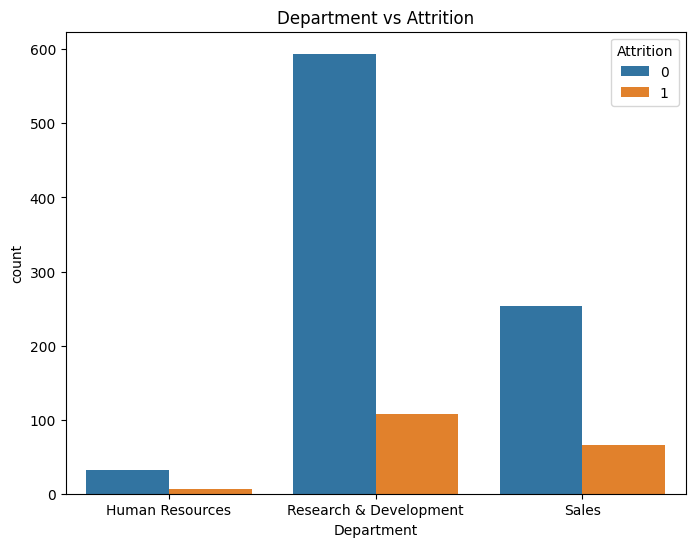

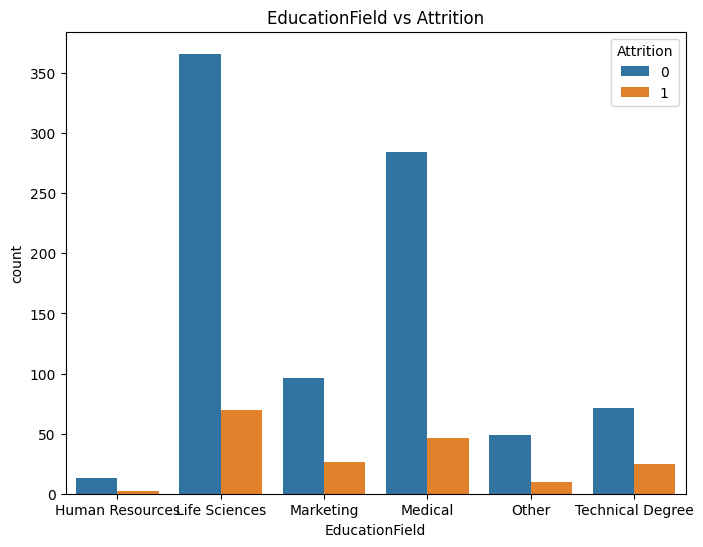

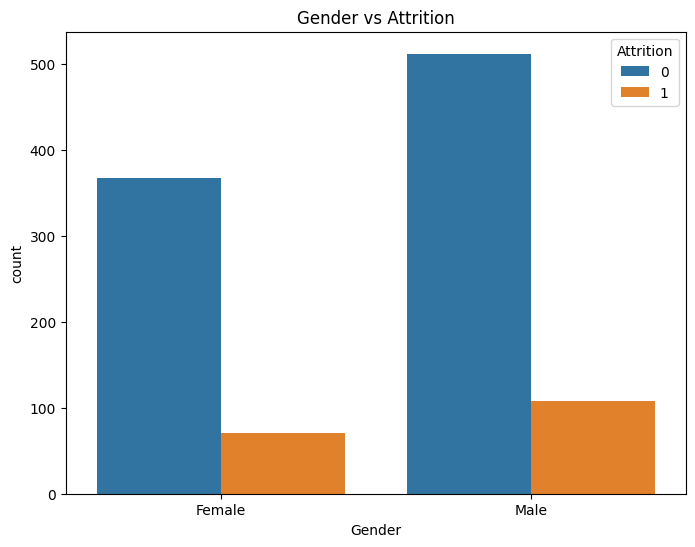

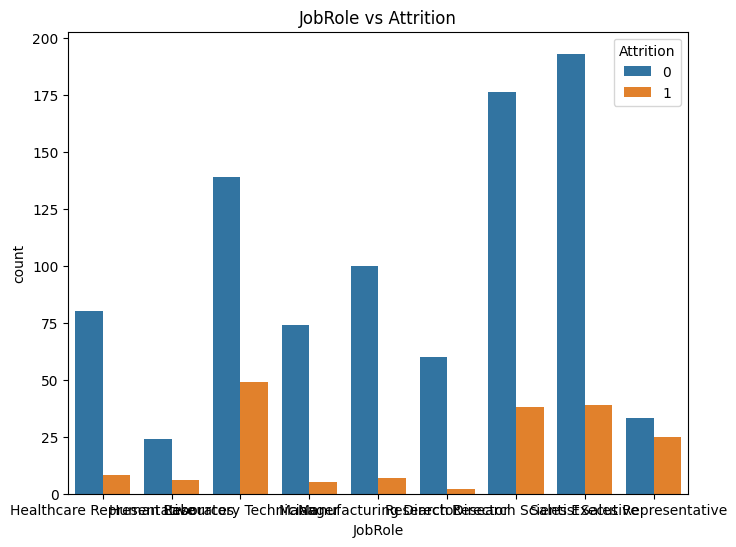

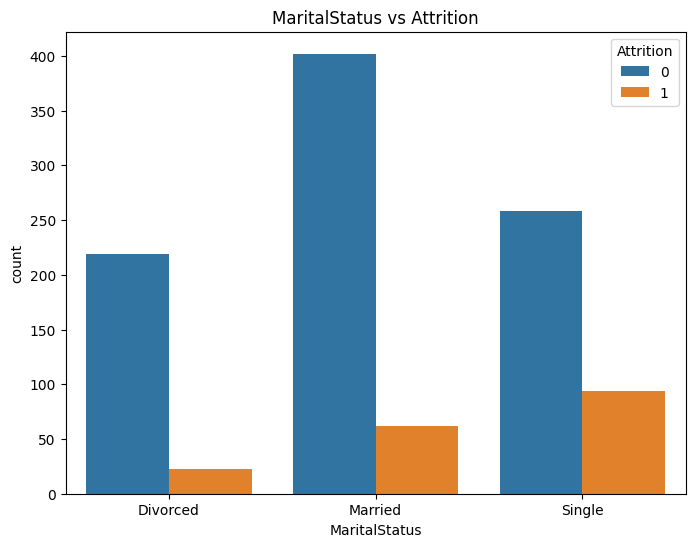

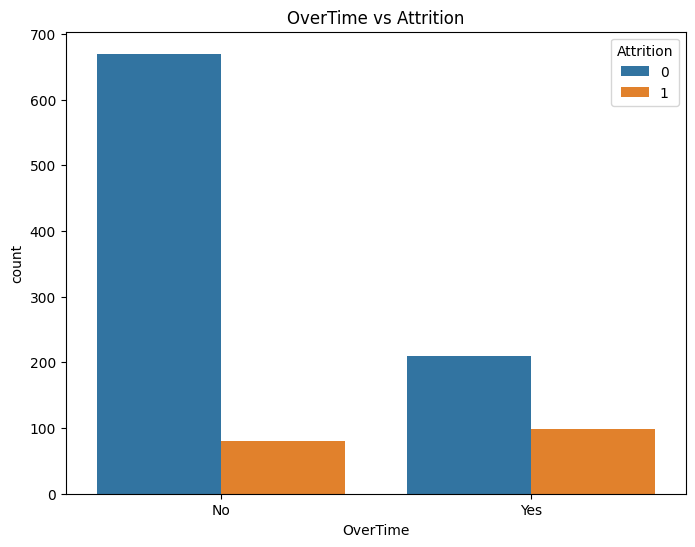

In [ ]:
# Daftar kolom kategorikal
categorical_columns = df_clean.select_dtypes(include='category').columns

# Loop untuk visualisasi kolom kategorikal vs Attrition
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Attrition', data=df_clean)
    plt.title(f'{col} vs Attrition')
    plt.show()

In [ ]:
df_fe = df_clean.copy()

In [ ]:
# One-Hot Encoding (Untuk merubah data kategorikal menjadi numerik)
from sklearn.preprocessing import LabelEncoder

# Membuat instance LabelEncoder
le = LabelEncoder()

# Melakukan Label Encoding pada setiap fitur secara langsung
df_fe['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df_fe['Department'] = le.fit_transform(df['Department'])
df_fe['EducationField'] = le.fit_transform(df['EducationField'])
df_fe['Gender'] = le.fit_transform(df['Gender'])
df_fe['JobRole'] = le.fit_transform(df['JobRole'])
df_fe['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df_fe['OverTime'] = le.fit_transform(df['OverTime'])

# Menampilkan hasil encoding
df_fe.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,37,1,2,1141,1,11,2,3,1,0,...,3,1,0,15,2,1,1,0,0,0
2,51,1,2,1323,1,4,4,1,1,1,...,3,3,3,18,2,4,10,0,2,7
3,42,0,1,555,2,26,3,2,3,0,...,3,4,1,23,2,4,20,4,4,8
6,40,0,2,1124,2,1,2,3,2,1,...,4,3,3,6,2,2,4,3,0,2
7,55,1,2,725,1,2,3,3,4,1,...,3,4,1,24,2,3,5,2,1,4


In [ ]:
# Tampilkan semua kolom
pd.set_option('display.max_columns', None)

# Lihat 5 baris pertama tanpa kolom terpotong
df_fe.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,37,1,2,1141,1,11,2,3,1,0,61,1,2,0,2,1,4777,14382,5,0,15,3,1,0,15,2,1,1,0,0,0
2,51,1,2,1323,1,4,4,1,1,1,34,3,1,6,3,1,2461,10332,9,1,12,3,3,3,18,2,4,10,0,2,7
3,42,0,1,555,2,26,3,2,3,0,77,3,4,7,2,1,13525,14864,5,0,14,3,4,1,23,2,4,20,4,4,8
6,40,0,2,1124,2,1,2,3,2,1,57,1,2,7,4,1,7457,13273,2,1,22,4,3,3,6,2,2,4,3,0,2
7,55,1,2,725,1,2,3,3,4,1,78,3,5,3,1,1,19859,21199,5,1,13,3,4,1,24,2,3,5,2,1,4


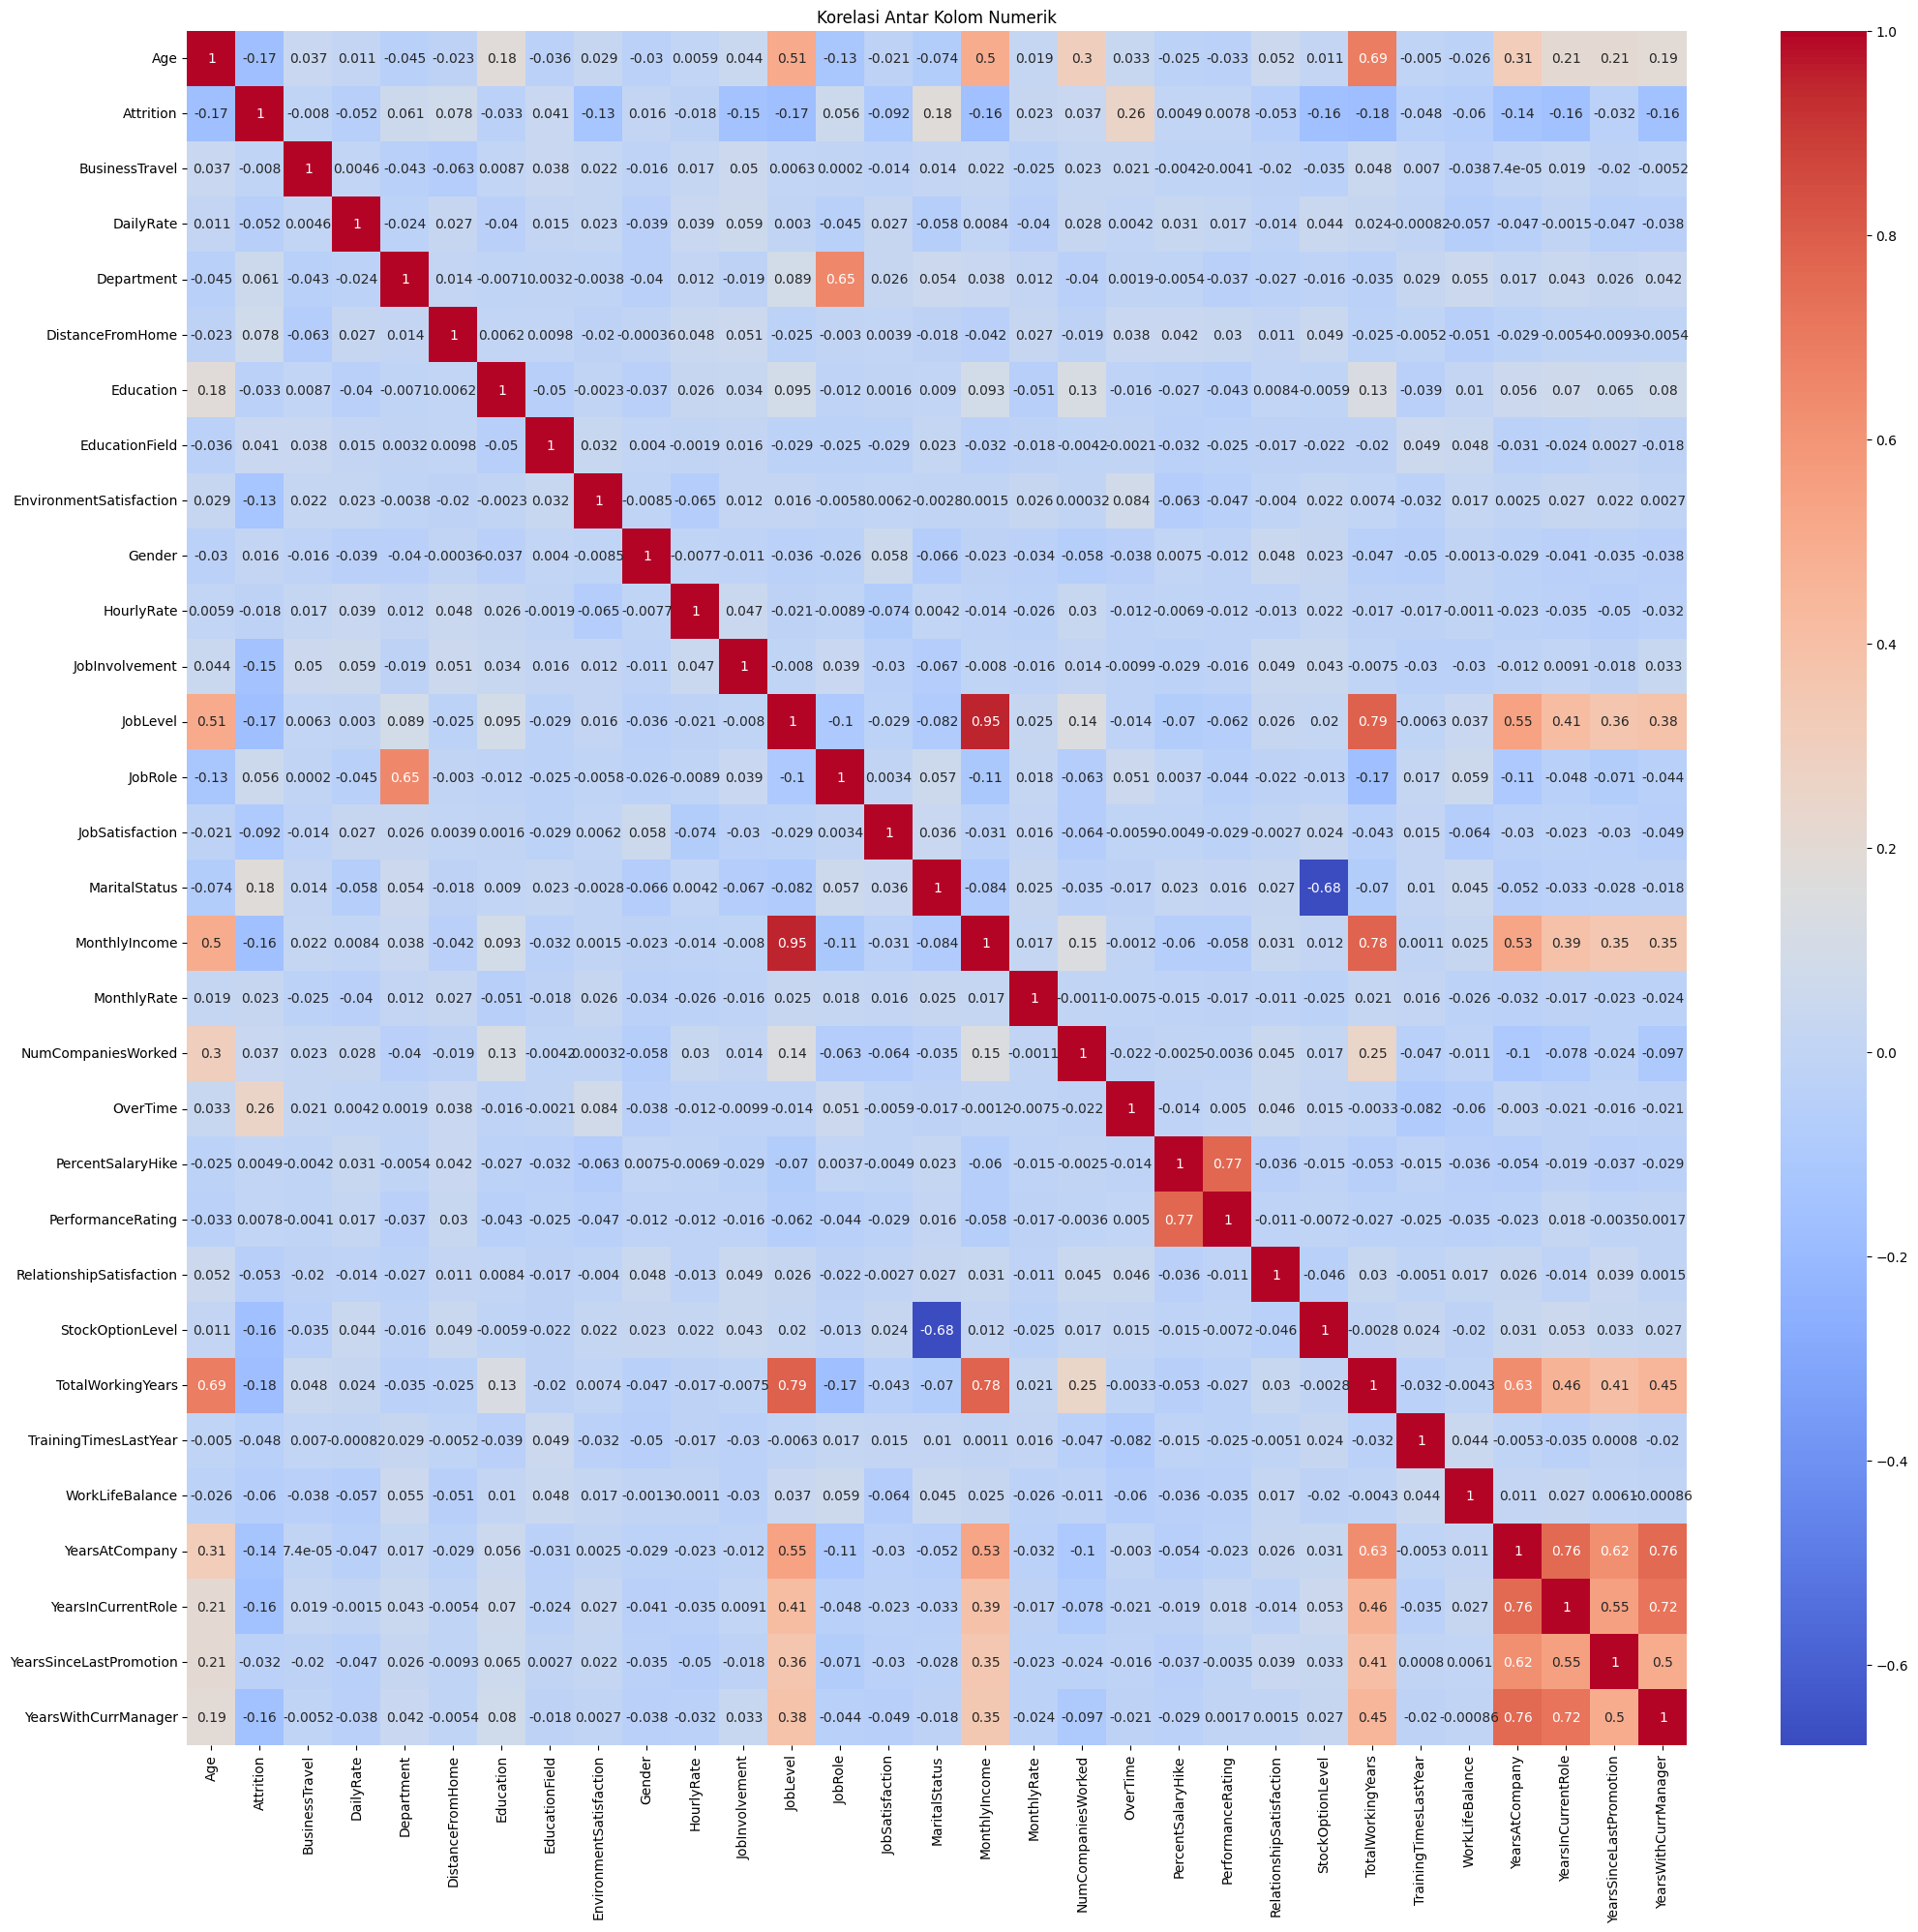

In [ ]:
# Pilih kolom numerik
numerical_columns = df_fe.select_dtypes(include='number')

# Hitung korelasi
corr_matrix = numerical_columns.corr()

# Tampilkan heatmap
plt.figure(figsize=(25, 23))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Kolom Numerik")
plt.show()

## **Modelling**

In [ ]:
# Pisahkan fitur dan target
X = df_fe.drop(columns='Attrition')
y = df_fe['Attrition']

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Inisialisasi model dan training
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prediksi data test
y_pred = dt_model.predict(X_test)

## **Evaluation**

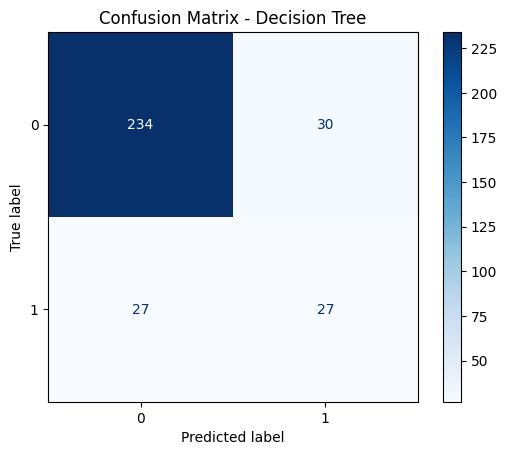

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       264
           1       0.47      0.50      0.49        54

    accuracy                           0.82       318
   macro avg       0.69      0.69      0.69       318
weighted avg       0.82      0.82      0.82       318



In [ ]:
# Evaluasi dengan confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Metrik evaluasi
print("Classification Report:")
print(classification_report(y_test, y_pred))

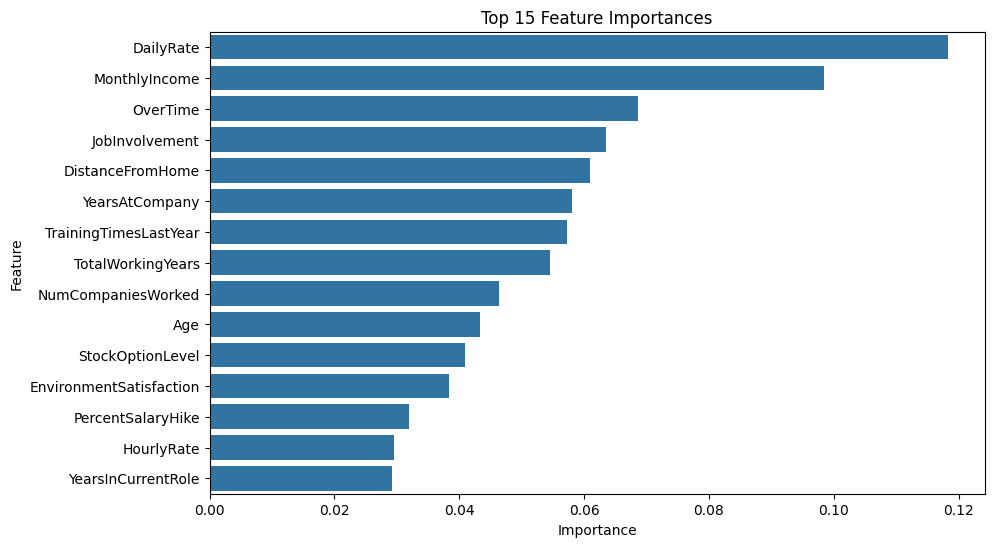

In [ ]:
# Feature Importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance.head(15), x='Importance', y='Feature')
plt.title('Top 15 Feature Importances')
plt.show()

In [ ]:
# Save model
import joblib
joblib.dump(dt_model, 'employees_attrition_model.pkl')

['employees_attrition_model.pkl']

In [ ]:
!pip freeze > requirements.txt